In [1]:
#Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
oil = pd.read_csv(r'E:/time_series/oil.csv')
holidays = pd.read_csv(r'E:time_series/holidays_events.csv')
sample = pd.read_csv(r'E:/time_series/sample_submission.csv')
stores = pd.read_csv(r'E:/time_series/stores.csv')
test = pd.read_csv(r'E:/time_series/test.csv')
train = pd.read_csv(r'E:/time_series/train.csv')
transactions = pd.read_csv(r'E:/time_series/transactions.csv')

## Data Exploration and Cleaning

In [3]:
def get_info(df):
  print(" -- DATA -- ")
  print(df.head())
  print(" -- Shape --")
  print(df.shape)
  print(" -- Feature datatypes and non null value details -- ")
  print(df.info())
  print(" -- Feature statistical details -- ")
  print(df.describe().transpose())
  print(" -- Columns -- ")
  print(df.columns)
  print(" -- Null Values -- ")
  print(df.isnull().sum())

In [4]:
#OIL DATASET

get_info(oil)

 -- DATA -- 
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
 -- Shape --
(1218, 2)
 -- Feature datatypes and non null value details -- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None
 -- Feature statistical details -- 
             count       mean        std    min     25%    50%    75%     max
dcoilwtico  1175.0  67.714366  25.630476  26.19  46.405  53.19  95.66  110.62
 -- Columns -- 
Index(['date', 'dcoilwtico'], dtype='object')
 -- Null Values -- 
date           0
dcoilwtico    43
dtype: int64


In [5]:
#Only contains missing values for one feature, imputing the missing with the previous valid observation

oil["dcoilwtico"].fillna(method = "bfill", inplace = True)

In [6]:
#HOLIDAYS Dataset

get_info(holidays)

 -- DATA -- 
         date     type    locale locale_name                    description   
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta  \
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
 -- Shape --
(350, 6)
 -- Feature datatypes and non null value details -- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-

In [7]:
#No missing values

#But in the dataset description, it is mentioned that the Transferred holidays must be taken special care of: 
holidays.loc[holidays.type=="Transfer", "description"] = holidays.loc[holidays.type == "Transfer", "description"].str.replace("Translado", "") ##Remove Translado word in the holidays as they are transferred holidays.
holidays['type'].replace("Transfer", "Normal", inplace = True) #Transferred holidays celebrated on that day from some other day

In [8]:
# STORES Dataset

get_info(stores)

 -- DATA -- 
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
 -- Shape --
(54, 5)
 -- Feature datatypes and non null value details -- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None
 -- Feature statistical details -- 
   

In [9]:
# TRANSACTIONS DATASET

get_info(transactions)

 -- DATA -- 
         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922
 -- Shape --
(83488, 3)
 -- Feature datatypes and non null value details -- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None
 -- Feature statistical details -- 
                count         mean         std  min     25%     50%     75%   
store_nbr     83488.0    26.939237   15.608204  1.0    13.0    27.0    40.0  \
transactions  83488.0  1694.602158  963.286644  5.0  1046.0  1393.0  2079.0   

                 max  
store_

In [10]:
# TRAIN Dataset

get_info(train)

 -- DATA -- 
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
 -- Shape --
(3000888, 6)
 -- Feature datatypes and non null value details -- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
 -- Feature statistical details -- 
                 count          mean            std  min        25%   
id           3000888.0  1.500444e+06  866281.8

## Data Visualization

In [11]:
def date_form(df):
    df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d")

In [12]:
date_form(holidays)
date_form(oil)
date_form(train)
date_form(test)
date_form(transactions)

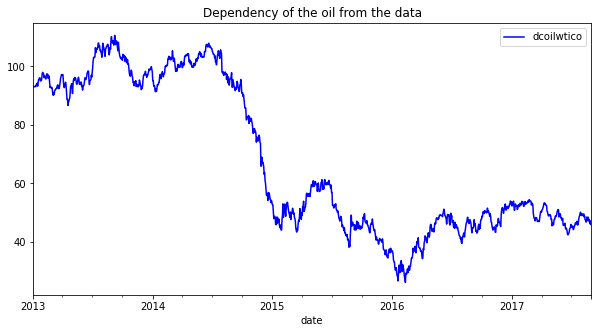

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
oil.plot.line(x="date", y="dcoilwtico", color="b", ax=axes, rot=0)
plt.title("Dependency of the oil from the data")
plt.show()

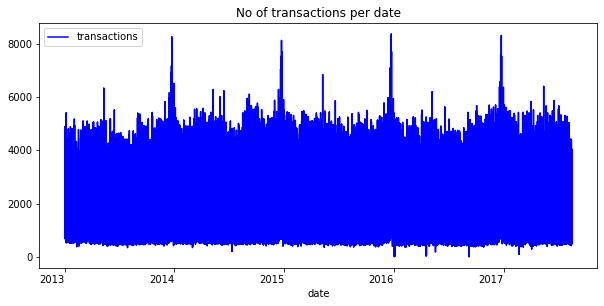

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
transactions.plot.line(x="date", y="transactions", color="b", ax=axes, rot=0)
plt.title("No of transactions per date")
plt.show()

In [15]:
def plot_stats(df, column, ax,color,angle):
    count_classes = df[column].value_counts()
    ax = sns.barplot(x=count_classes.index, y=count_classes, ax=ax, palette=color)
    ax.set_title(column.upper(), fontsize=20)
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

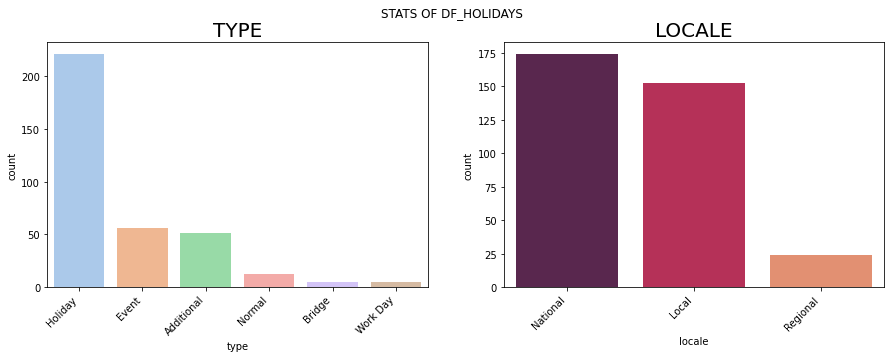

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.autofmt_xdate()
fig.suptitle("Stats of df_holidays".upper())
plot_stats(holidays, "type", axes[0], "pastel", 45)
plot_stats(holidays, "locale", axes[1], "rocket", 45)
plt.show()

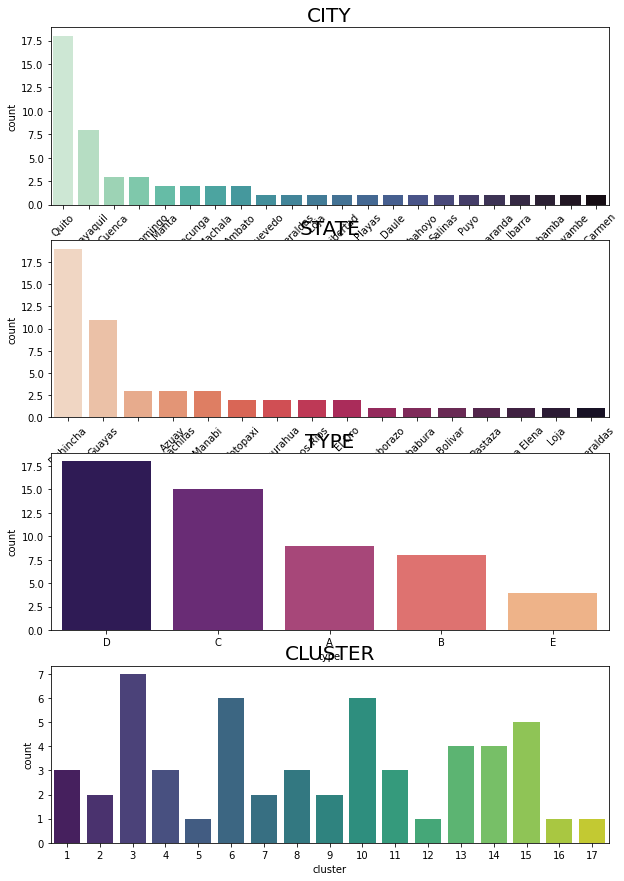

In [17]:
## stores
fig, axes = plt.subplots(nrows = 4, ncols=1, figsize=(10, 15))
plot_stats(stores, "city", axes[0], "mako_r", 45)
plot_stats(stores, "state", axes[1], "rocket_r", 45)
plot_stats(stores, "type", axes[2], "magma", 0)
plot_stats(stores, "cluster", axes[3], "viridis", 0)

## Data merging 

In [18]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [19]:
df = train.merge(holidays, on = 'date', how = 'left')
df.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False


In [20]:
df = df.merge(oil, on = 'date', how = 'left')
df.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14


In [21]:
df = df.merge(stores, on = 'store_nbr', how = 'left')
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13


In [22]:
df = df.merge(transactions, on = ['date', 'store_nbr'], how = 'left')
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN


In [23]:
df = df.rename(columns = {'type_x' : "holiday_type", "type_y" : "store_type"})
df.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN


In [24]:
df['holiday_type'] = df['holiday_type'].replace({np.nan : "Normal"})

In [25]:
#Removing rows having transactions MISSING

df = df[df["transactions"].isnull() == False]

In [26]:
df["dcoilwtico"] = df["dcoilwtico"].fillna(method = 'bfill')

In [27]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
561,561,2013-01-01,25,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
562,562,2013-01-01,25,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
563,563,2013-01-01,25,BEAUTY,2.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
564,564,2013-01-01,25,BEVERAGES,810.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0
565,565,2013-01-01,25,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Salinas,Santa Elena,D,1,770.0


In [28]:
#Dropping unneeded data

df = df.drop(['locale_name', "description", "transferred"], axis = 1)
df = df.drop(['locale', 'family', 'city', 'state', 'cluster', 'store_type'], axis = 1)

## Encoding Categorical Values

In [29]:
#One hot encoding the categorical values -- type_x (store type) and type_y (holiday type)

from sklearn.preprocessing import OneHotEncoder
low_card_cols = ["holiday_type"]
low_card_enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
low_card_df = pd.DataFrame(low_card_enc.fit_transform(df[low_card_cols])) # creating a seperate Dataframe to hold the encoded values
low_card_df.index = df.index #To make sure merging happens correctly
df_encoded = pd.concat([df.drop(low_card_cols, axis = 1), low_card_df], axis=1)

df_encoded.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,0,1,2,3,4,5
561,561,2013-01-01,25,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
562,562,2013-01-01,25,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
563,563,2013-01-01,25,2.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
564,564,2013-01-01,25,810.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
565,565,2013-01-01,25,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0


### Dropping columns that wont be needed for prediction

In [30]:
df_encoded.drop('store_nbr', axis = 1, inplace = True)
df_encoded.drop('id', axis = 1, inplace = True)

In [31]:
df_encoded.head()

,date,sales,onpromotion,dcoilwtico,transactions,0,1,2,3,4,5
561,2013-01-01,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
562,2013-01-01,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
563,2013-01-01,2.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
564,2013-01-01,810.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0
565,2013-01-01,0.0,0,93.14,770.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
df_f = df_encoded.groupby("date").agg(np.mean) # Grouping the dataframe results into 1 row for each date and taking mean of all the other values and aggregating into one record
df_f.head()

,sales,onpromotion,dcoilwtico,transactions,0,1,2,3,4,5
date,,,,,,,,,,
2013-01-01,76.109667,0.0,93.14,770.000000,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-02,326.806599,0.0,93.14,2026.413043,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-03,238.116753,0.0,92.97,1706.608696,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-04,233.504399,0.0,93.12,1706.391304,0.0,0.0,0.0,0.0,1.0,0.0
2013-01-05,314.459895,0.0,93.20,2034.195652,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
df_f.isnull().sum()  #Final dataset doesnt have any missing values, thats good! 

sales           0
onpromotion     0
dcoilwtico      0
transactions    0
0               0
1               0
2               0
3               0
4               0
5               0
dtype: int64

In [34]:
df_f = df_f.astype('float64')  #Converting all features to float values

### Function to create dataframe with WINDOW = 1 and LAG = 1 for Time Series Analysis

In [35]:
def series_to_supervised2(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [36]:
### Normalizing Data for faster LSTM fitting

In [37]:
values = df_f.values

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

scaled_df_split = scaler.fit_transform(values)

In [39]:
window = 1
lag = 1
series = series_to_supervised2(scaled_df_split, n_in=window, n_out=lag)

In [40]:
series.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
1,0.000000,0.0,0.792965,0.040153,0.0,0.0,0.0,1.0,0.0,0.0,0.329684,0.0,0.792965,0.513847,0.0,0.0,0.0,0.0,1.0,0.0
2,0.329684,0.0,0.792965,0.513847,0.0,0.0,0.0,0.0,1.0,0.0,0.213051,0.0,0.790951,0.393274,0.0,0.0,0.0,0.0,1.0,0.0
3,0.213051,0.0,0.790951,0.393274,0.0,0.0,0.0,0.0,1.0,0.0,0.206985,0.0,0.792728,0.393192,0.0,0.0,0.0,0.0,1.0,0.0
4,0.206985,0.0,0.792728,0.393192,0.0,0.0,0.0,0.0,1.0,0.0,0.313447,0.0,0.793675,0.516781,0.0,0.0,0.0,0.0,0.0,1.0
5,0.313447,0.0,0.793675,0.516781,0.0,0.0,0.0,0.0,0.0,1.0,0.350131,0.0,0.793675,0.491299,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
series.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
var1(t-1),1681.0,0.404823,0.166000,0.000000,0.272295,0.396531,0.507581,1.0
var2(t-1),1681.0,0.175176,0.201670,0.000000,0.000000,0.089498,0.317307,1.0
var3(t-1),1681.0,0.494151,0.304485,0.000000,0.239015,0.320028,0.824588,1.0
var4(t-1),1681.0,0.389117,0.085515,0.000000,0.332889,0.366886,0.434524,1.0
var5(t-1),1681.0,0.020523,0.138104,0.000000,0.000000,0.000000,0.000000,1.0
var6(t-1),1681.0,0.001487,0.036566,0.000000,0.000000,0.000000,0.000000,1.0
var7(t-1),1681.0,0.030785,0.170293,0.000000,0.000000,0.000000,0.000000,1.0
var8(t-1),1681.0,0.088192,0.281089,0.000000,0.000000,0.000000,0.000000,1.0
var9(t-1),1681.0,0.856336,0.350641,0.000000,1.000000,1.000000,1.000000,1.0
var10(t-1),1681.0,0.002677,0.050225,0.000000,0.000000,0.000000,0.000000,1.0


In [42]:
#These are the columns we dont want to predict, we drop them. We only have to predict sales and not the rest.
series.drop(series.columns[[11,12,13,14,15,16,17,18,19]], axis=1, inplace=True)

In [43]:
series.head() # Final dataset that we pass to LSTM models.

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
1,0.000000,0.0,0.792965,0.040153,0.0,0.0,0.0,1.0,0.0,0.0,0.329684
2,0.329684,0.0,0.792965,0.513847,0.0,0.0,0.0,0.0,1.0,0.0,0.213051
3,0.213051,0.0,0.790951,0.393274,0.0,0.0,0.0,0.0,1.0,0.0,0.206985
4,0.206985,0.0,0.792728,0.393192,0.0,0.0,0.0,0.0,1.0,0.0,0.313447
5,0.313447,0.0,0.793675,0.516781,0.0,0.0,0.0,0.0,0.0,1.0,0.350131


In [44]:
series_values = series.values

In [45]:
# Label
labels = series["var1(t)"] # SALES VALUE - DEPENDENT VARIABLE
series = series.drop("var1(t)", axis=1) # INDEPENDENT VARIABLES

In [46]:
l_values = labels.values
s_values = series.values

In [47]:
series.shape

(1681, 10)

In [48]:
split_length = 365*3 #Will train on 3 years of data and predict the rest

X_train = s_values[:split_length]
X_test = s_values[split_length:]

y_train = l_values[:split_length]
y_test = l_values[split_length:]

print("Train shape: ", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

Train shape:  (1095, 10) (1095,)
Test shape:  (586, 10) (586,)


In [49]:
# Reshape for LSTM input

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (1095, 1, 10)
X_test size:  (586, 1, 10)


## LSTM

In [50]:
from keras.optimizers import Adam

epochs = 50
batch = 64
lr = 0.0001
adam = Adam(lr)

In [51]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error,r2_score

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(16))
model.add(Dense(1))

In [52]:
print(X_train.shape[1], X_train.shape[2])

1 10


In [53]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [54]:
model.compile(loss = 'mse', optimizer=adam)

In [55]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks = callback,  epochs=epochs, verbose=1)

Epoch 1/50
35/35 [==============================] - 3s 17ms/step - loss: 0.1341 - val_loss: 0.2516
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.1074 - val_loss: 0.2131
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0843 - val_loss: 0.1763
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0643 - val_loss: 0.1411
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0478 - val_loss: 0.1090
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.0818
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.0620
Epoch 8/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0487
Epoch 9/50
35/35 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.0417
Epoch 10/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.0367
Epoch 11/50
35/35 

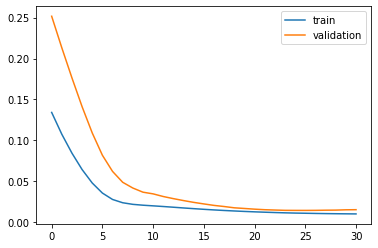

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [57]:
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

19/19 [==============================] - 0s 3ms/step
Test RMSE: 93.944
